# Analyse exploratoire

**Problématique de la ville de Seattle**  
Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..)

Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe.

**Votre mission**  
Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

- Réaliser une courte analyse exploratoire.
- Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

L’objectif est de se passer des relevés de consommation annuels (attention à la fuite de données), mais rien n'interdit d’en déduire des variables plus simples (nature et proportions des sources d’énergie utilisées). 

Faire bien attention au traitement des différentes variables, à la fois pour trouver de nouvelles informations (peut-on déduire des choses intéressantes d’une simple adresse ?) et optimiser les performances en appliquant des transformations simples aux variables (normalisation, passage au log, etc.).

Mettre en place une évaluation rigoureuse des performances de la régression, et optimiser les hyperparamètres et le choix d’algorithme de ML à l’aide d’une validation croisée.

**Livrables attendus**  
- Un notebook de l'analyse exploratoire mis au propre et annoté.
- Le code (ou un notebook) des différents tests de modèles mis au propre, dans lequel vous identifierez clairement le modèle final choisi.
- Un support de présentation pour la soutenance.

**Compétences évaluées**  
- Mettre en place le modèle d'apprentissage supervisé adapté au problème métier
- Évaluer les performances d’un modèle d'apprentissage supervisé
- Adapter les hyperparamètres d'un algorithme d'apprentissage supervisé afin de l'améliorer
- Transformer les variables pertinentes d'un modèle d'apprentissage supervisé

# Sommaire

__[I. Chargement et nettoyage des données](#I.-Chargement-et-nettoyage-des-données)__\
[I.1 Descriptions des indicateurs](#I.1-Descriptions-des-indicateurs)\
[I.2 Sélection des variables](#I.2-Sélection-des-variables)

__[II. Analyse exploratoire](#II.-Analyse-exploratoire)__\
[II.1 Variables qualitatives et variables quantitatives](#II.1-Variables-qualitatives-et-variables-quantitatives)\
[II.2 Variables quantitatives](#II.2-Variables-quantitatives)\
[II.2.1 Distribution des variables quantitatives](#II.2.1-Distribution-des-variables-quantitatives)\
[II.2.2 outliers](#II.2.2-outliers)\
[II.2.3 Transformation des variables cibles](#II.2.3-Transformation-des-variables-cibles)\
[II.2.4 Etude des corrélations](#II.2.4-Etude-des-corrélations)\
[II.2.4.i Variables cibles](#II.2.4.i-Variables-cibles)\
[II.2.4.ii Prédicteurs](#II.2.4.ii-Prédicteurs)\
[II.3 Variables catégorielles](#II.3-Variables-catégorielles)\
[II.3.1 Nettoyage des variables catégorielles](#II.3.1-Nettoyage-des-variables-catégorielles)\
[II.3.2 Etude des corrélations](#II.3.2-Etude-des-corrélations)

__[A suivre: Latitude, Longitude](#A-suivre:-Latitude,-Longitude)__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# I. Chargement et nettoyage des données

## I.1 Descriptions des indicateurs

1er dataset: 2015-building-energy-benchmarking.csv

In [2]:
data2015 = pd.read_csv("./data/2015-building-energy-benchmarking.csv")
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
indicators = pd.Series(data2015.columns, name="indicators")
indicators

0                                         OSEBuildingID
1                                              DataYear
2                                          BuildingType
3                                   PrimaryPropertyType
4                                          PropertyName
5                         TaxParcelIdentificationNumber
6                                              Location
7                                   CouncilDistrictCode
8                                          Neighborhood
9                                             YearBuilt
10                                    NumberofBuildings
11                                       NumberofFloors
12                                     PropertyGFATotal
13                                   PropertyGFAParking
14                               PropertyGFABuilding(s)
15                            ListOfAllPropertyUseTypes
16                               LargestPropertyUseType
17                            LargestPropertyUse

2eme dataset: 2016-building-energy-benchmarking

In [4]:
data2016 = pd.read_csv("./data/2016-building-energy-benchmarking.csv")
indicators_2016 = pd.Series(data2016.columns, name="indicators_2016")
indicators_2016

0                       OSEBuildingID
1                            DataYear
2                        BuildingType
3                 PrimaryPropertyType
4                        PropertyName
5                             Address
6                                City
7                               State
8                             ZipCode
9       TaxParcelIdentificationNumber
10                CouncilDistrictCode
11                       Neighborhood
12                           Latitude
13                          Longitude
14                          YearBuilt
15                  NumberofBuildings
16                     NumberofFloors
17                   PropertyGFATotal
18                 PropertyGFAParking
19             PropertyGFABuilding(s)
20          ListOfAllPropertyUseTypes
21             LargestPropertyUseType
22          LargestPropertyUseTypeGFA
23       SecondLargestPropertyUseType
24    SecondLargestPropertyUseTypeGFA
25        ThirdLargestPropertyUseType
26     Third

Indicateurs qui ne sont pas en commun entre les deux datasets?

In [5]:
set(indicators_2016.to_numpy()).difference(indicators.to_numpy())

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [6]:
set(indicators.to_numpy()).difference(set(indicators_2016.to_numpy()))

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

#### Indicateurs 2015-building-energy-benchmarking

name | description 
--- | --- |
OSEBuildingID|A unique identifier assigned to each property covered by the Seattle Benchmarking Ordinance for tracking and identification purposes.
"BuildingType"|"City of Seattle building type classification."
PrimaryPropertyType|The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.
PropertyName|Official or common property name.
TaxParcelIdentificationNumber|Property King County PIN
CouncilDistrictCode|Property City of Seattle council district.
YearBuilt|Year in which a property was constructed or underwent a complete renovation.
PropertyGFATotal|Total building and parking gross floor area.
PropertyGFAParking|Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open).
PropertyGFABuilding(s)|Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.
ENERGYSTARScore|An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.
SiteEUI(kBtu/sf)|Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
SiteEUIWN(kBtu/sf)|Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
SourceEUI(kBtu/sf)|Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
SourceEUIWN(kBtu/sf)|Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
SiteEnergyUse(kBtu)|The annual amount of energy consumed by the property from all sources of energy.
SteamUse(kBtu)|The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).
Electricity(kWh)|The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.
Electricity(kBtu)|The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).
NaturalGas(therms)|The annual amount of utility-supplied natural gas consumed by the property, measured in therms.
GHGEmissions(MetricTonsCO2e)|The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.
GHGEmissionsIntensity(kgCO2e/ft2)|Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources



#### Indicateurs 2016-building-energy-benchmarking

name | description 
--- | --- |
TotalGHGEmissions|The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.
GHGEmissionsIntensity|Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

Indicateur Location dans la table 2015 absent de la table 2016, en revanche les indicateurs Latitude, Longitude, Address, City, State et Zipcode sont absents de la table 2015 et présents dans 2016.

In [7]:
data2015.Location.iloc[0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

Il semblerait que les colonnes Latitude Longitude Address City State ZipCode soient contenues dans Location

Dans la table 2015, les valeurs de Zip Codes semble être générés automatiquement - on l'écarte du jeu de données

In [8]:
data2015.drop(columns="Zip Codes", inplace=True)

On va donc, dans la table 2015: 
- splitter Location en Latitude, Longitude, Address City State ZipCode
- Retirer Zip Codes

Renommer certaines colonnes pour assurer la correspondance avec 2016, de façon à fusionner les tables
- GHGEmissions(MetricTonsCO2e) (2015) et TotalGHGEmissions (2016) sont en fait les mêmes colonnes
- GHGEmissionsIntensity(kgCO2e/ft2) et GHGEmissionsIntensity sont les mêmes colonnes

**1. Split**

In [9]:
from ast import literal_eval # module pour évaluer une expression et renvoyer l'objet correspondant

data2015["Location"] = data2015["Location"].apply(literal_eval) # convertit les str en dict
df = pd.json_normalize(data2015["Location"]) # Normalize semi-structured JSON data into a flat table.
df.human_address = df.human_address.apply(literal_eval)
df2 = pd.json_normalize(df.human_address)
df2.head()

,address,city,state,zip
0,405 OLIVE WAY,SEATTLE,WA,98101
1,724 PINE ST,SEATTLE,WA,98101
2,1900 5TH AVE,SEATTLE,WA,98101
3,620 STEWART ST,SEATTLE,WA,98101
4,401 LENORA ST,SEATTLE,WA,98121


In [10]:
loc = data2015.columns.get_loc("Location")
data2015.drop(columns="Location", inplace=True)
d = pd.concat([df.drop(columns="human_address"), df2], axis=1) # nouveau dataframe à partir des colonnes extraites

for c in d.columns[::-1]: # Insertion des colonnes dans le df original, une par une
    data2015.insert(loc, c, d[c])

data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,latitude,longitude,address,city,...,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,...,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,47.61310583,-122.33335756,724 PINE ST,SEATTLE,...,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,...,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,...,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,...,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0


**2. Renommage**

In [11]:
data2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                         "GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity",
                         "Comment":"Comments",
                         "latitude":"Latitude", 
                         "longitude":"Longitude", 
                         "address":"Address", 
                         "city":"City",
                         "state":"State"}, inplace=True)

data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Latitude,Longitude,Address,City,...,TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,...,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,47.61310583,-122.33335756,724 PINE ST,SEATTLE,...,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,...,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,...,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,...,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0


Fusion des deux datasets en un dataset global

In [12]:
# création du dataset global
raw_data = pd.concat([data2015, data2016], join="outer")

# Récupération de la liste de colonnes sous forme de Series
raw_data_cols = pd.Series(raw_data.columns, name="data_cols")

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 52 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  6716 non-null   int64  
 1   DataYear                                                       6716 non-null   int64  
 2   BuildingType                                                   6716 non-null   object 
 3   PrimaryPropertyType                                            6716 non-null   object 
 4   PropertyName                                                   6716 non-null   object 
 5   TaxParcelIdentificationNumber                                  6714 non-null   object 
 6   Latitude                                                       6716 non-null   object 
 7   Longitude                                                   

## I.2 Sélection des variables

On effectue un premier tri des variables, en écartant d'emblée celles qui semblent le moins pertinentes, et celles qui constituent un risque de fuite de données (SiteEUI, SiteEUIWN, SiteEnergyUseWN, GHGEmissionsIntensity) ou qui ne correspondent pas au cahier des charges (données du permis d'exploitation commercial), comme SourceEUI, SourceEUIWN. On garde en revanche les variables Electricity, NaturalGas, SteamUse comme suggéré.

<AxesSubplot:>

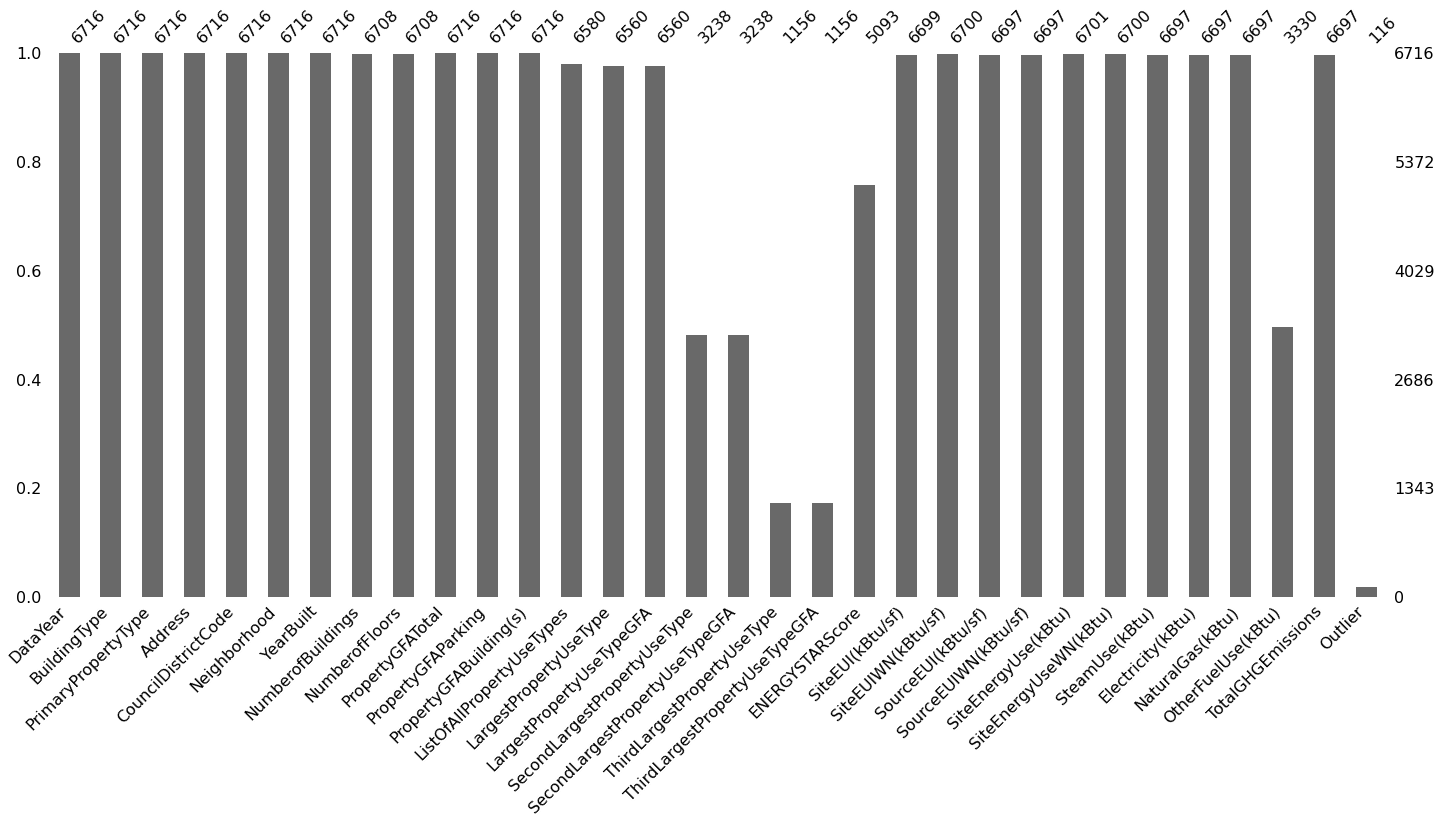

In [13]:
to_drop_index = [0, #OSEBuildingID 
                 *range(4, 8), # PropertyName, TaxParcelIdentificationNumber --> Latitude
                 *range(9, 12), # City, State, zip
                 27, # YearsENERGYSTARCertified
                 #*range(30, 31), # SiteEUIWN
                 #*range(32, 33), # SourceEUIWN
                 #34, # SiteEnergyUseWN
                 36, # Electricity (kWh)
                 38, # NaturalGas (therms)
                 *range(42, 46), # GHGEmissionIntensity, DefaultData, Comments, ComplianceStatus
                 *range(47,52)] # 2010 Census Tracts, Seattle Police..., City Council, SPD Beats, ZipCode
to_drop_cols = raw_data_cols.iloc[to_drop_index]
raw_data = raw_data.drop(columns=to_drop_cols)

msno.bar(raw_data)

Toutes les variables sont quasiment ou totalement remplies, à l'exception de SecondLargestPropertyUseType, ThirdLargestPropertyUseType, SecondLargest\[...\]GFA, ThirdLargest\[...\]GFA. On inspecte ces variables, qui semblent appartenir à des couples (catégorielle, quantitative).

**ListofAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType**

In [14]:
raw_data[["ListOfAllPropertyUseTypes",
          "LargestPropertyUseType",
          "SecondLargestPropertyUseType", 
          "ThirdLargestPropertyUseType"]].sample(15)

,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
115,Residence Hall/Dormitory,Residence Hall/Dormitory,NaN,NaN
595,"Data Center, Office",Office,Data Center,NaN
2072,"Office, Parking",Office,Parking,NaN
2188,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare
2789,Multifamily Housing,Multifamily Housing,NaN,NaN
502,"Parking, Strip Mall",Strip Mall,Parking,NaN
2117,Multifamily Housing,Multifamily Housing,NaN,NaN
3269,K-12 School,K-12 School,NaN,NaN
2036,"Non-Refrigerated Warehouse, Office",Office,Non-Refrigerated Warehouse,NaN
2966,Multifamily Housing,Multifamily Housing,NaN,NaN


**Dans les variables catégorielles, on remplace NaN par "None". Sur les variables quantitatives associées, on va remplacer les NaN par 0**

In [15]:
raw_data["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
raw_data["ThirdLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
raw_data["SecondLargestPropertyUseType"].fillna("None", inplace=True)
raw_data["ThirdLargestPropertyUseType"].fillna("None", inplace=True)

On n'a plus besoin de la variable ListOfAllPropertyUseTypes

In [16]:
raw_data.drop(columns="ListOfAllPropertyUseTypes", inplace=True)

**OtherFuelUse(kBtu)**

In [17]:
raw_data["OtherFuelUse(kBtu)"].describe()

count    3.330000e+03
mean     7.142301e+03
std      1.962790e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.269669e+06
Name: OtherFuelUse(kBtu), dtype: float64

<AxesSubplot:xlabel='OtherFuelUse(kBtu)', ylabel='Count'>

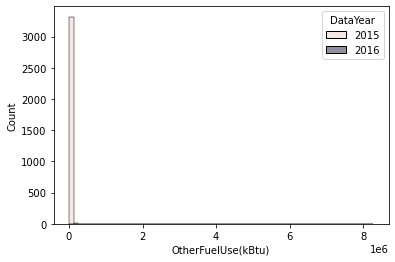

In [18]:
sns.histplot(data=raw_data, x="OtherFuelUse(kBtu)", hue="DataYear", bins=int(1+5*np.log2(raw_data.shape[0])))

In [19]:
print(raw_data["OtherFuelUse(kBtu)"].quantile(0.994))
print(raw_data["OtherFuelUse(kBtu)"].quantile(0.995))

0.0
194.18500000000995


Cette colonne ne contient pratiquement que des valeurs nulles. On la supprime.

<AxesSubplot:>

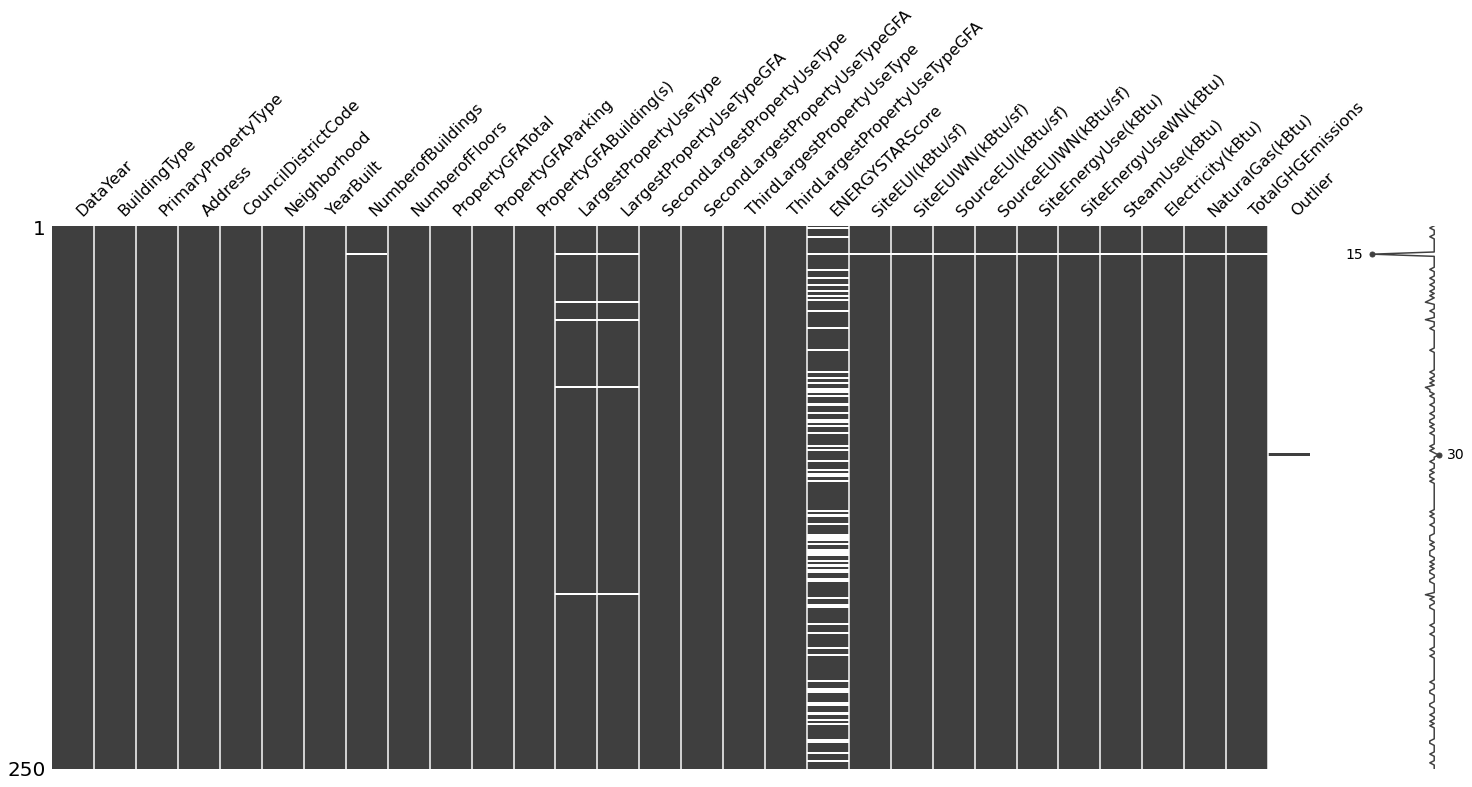

In [20]:
raw_data.drop(columns='OtherFuelUse(kBtu)', inplace=True)
msno.matrix(raw_data.sample(250))

On supprime les lignes contenant des valeurs manquantes.

<AxesSubplot:>

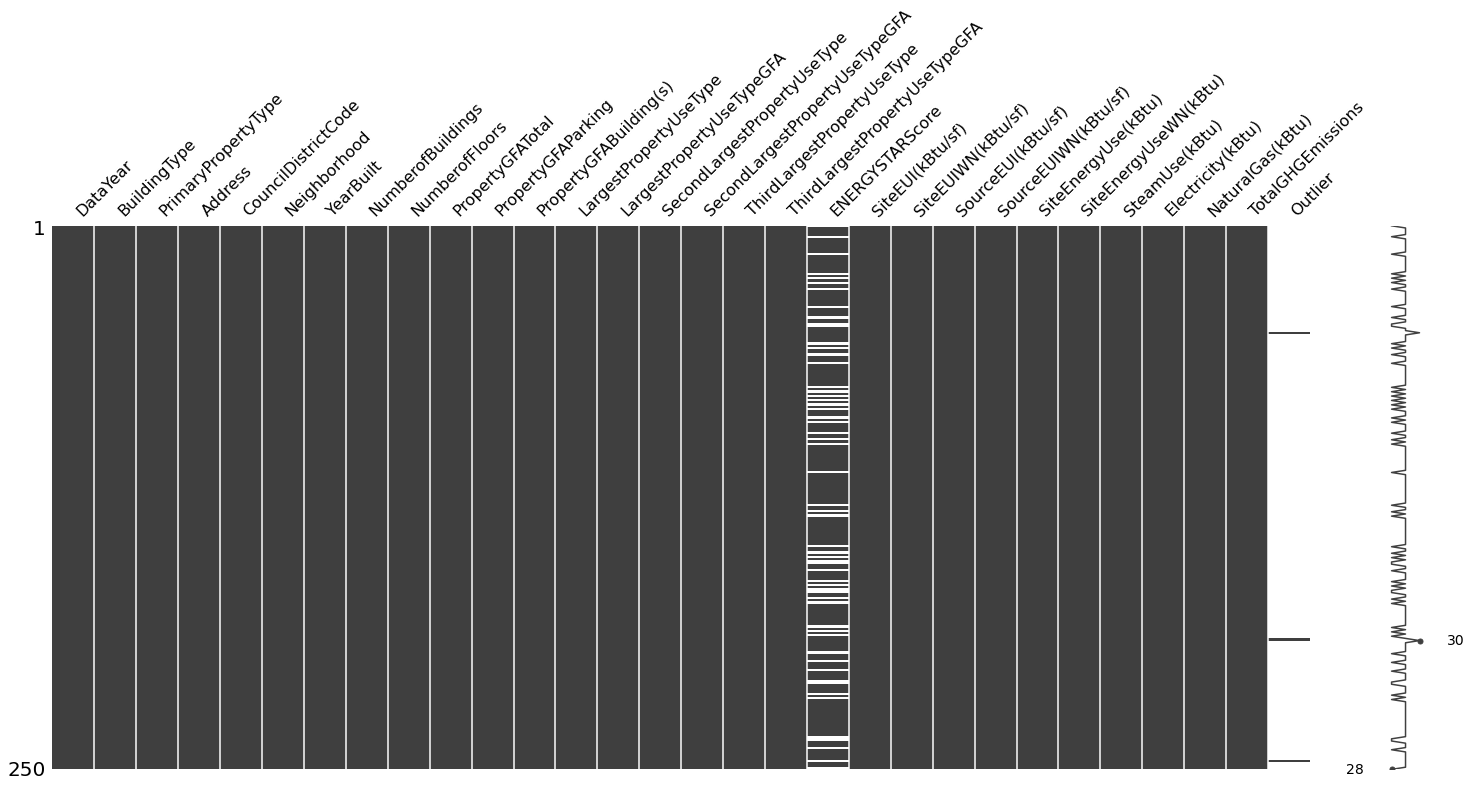

In [21]:
raw_data.dropna(subset=["SiteEnergyUse(kBtu)", "TotalGHGEmissions"], how="any", inplace=True)
raw_data.dropna(subset=["LargestPropertyUseType"],inplace=True)
raw_data.dropna(subset=["NumberofBuildings", "NumberofFloors"], how="any", inplace=True)
msno.matrix(raw_data.sample(250))

**Traitement de la variable Address**

In [22]:
raw_data.Address.sample(10)

2891      211 Summit Ave E
1088    1105 Spring Street
189      12738 33RD AVE NE
2708         316 2nd Ave S
2426      1009 WESTERN AVE
643      4422 Bagley Ave N
3332        1321 E JOHN ST
392         410 S FRONT ST
3275     945 HIAWATHA PL S
468          900 1ST AVE S
Name: Address, dtype: object

En ne récupérant que le dernier champ, on peut obtenir une information sur le type de voie. Le type de voie peut potentiellement renseigner sur la taille du bâtiment qui s'y trouve (avenue vs. chemin par exemple). On ajoute une condition: si l'élément récupéré se trouve parmi {"N", "S", "E", "W", "NE", "NW", "SE", "SW"}, on récupère l'élément précédent à la place.

In [23]:
raw_data["Address"] = raw_data.Address.apply(lambda x: x.split(' ')[-2].lower()
                      if x.split(' ')[-1].lower() in ["n","s","e","w","ne","nw","se",
                                                      "sw","n.","e.","s.","w.", "north",
                                                      "east", "west", "south", "n.e."]
                      else x.split(' ')[-1].lower())

In [24]:
pd.Series(raw_data.Address.value_counts()).sort_values(ascending=False)[:20]

ave         3240
st          1271
way          619
avenue       378
street       224
ave.         215
st.          143
pl           123
broadway      47
place         30
dr            25
blvd          14
s.w.          10
drive          8
madison        6
so.            5
n.w.           5
so             4
               4
harrison       4
Name: Address, dtype: int64

In [25]:
raw_data["Address"] = raw_data.Address.apply(lambda x: "avenue" if "ave" in x else x)
raw_data["Address"] = raw_data.Address.apply(lambda x: "street" if "st" in x else x)
raw_data["Address"] = raw_data.Address.apply(lambda x: "place" if "pl" in x else x)

pd.Series(raw_data.Address.value_counts()).sort_values(ascending=False)[:20]

avenue        3835
street        1645
way            619
place          157
broadway        47
dr              25
blvd            14
s.w.            10
drive            8
madison          6
so.              5
n.w.             5
                 4
so               4
pike             4
harrison         4
jackson          4
pkwy             3
republican       3
rd               3
Name: Address, dtype: int64

<AxesSubplot:>

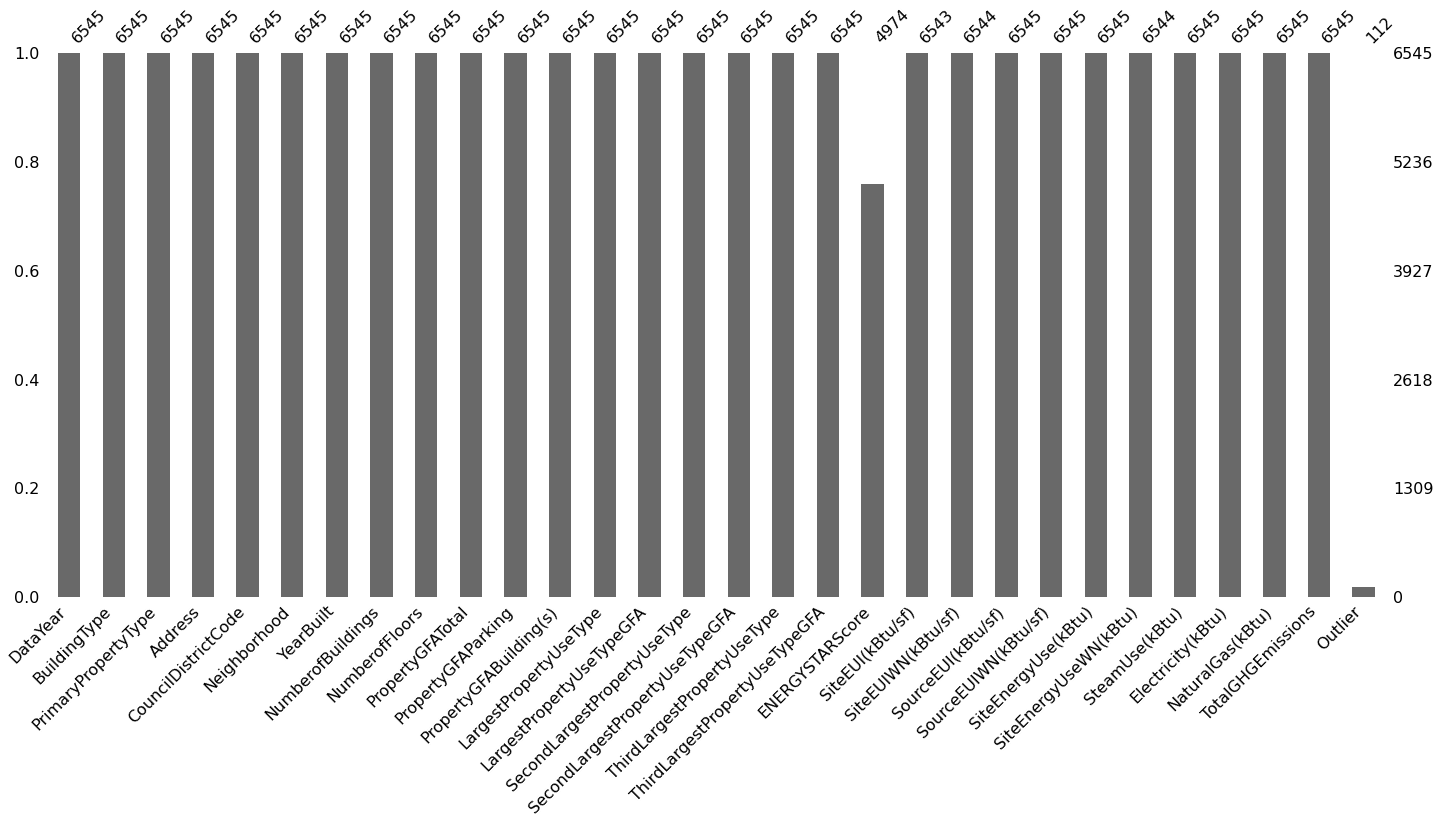

In [26]:
raw_data.to_csv("./raw_data.csv", index_label=False)
msno.bar(raw_data)

# II. Analyse exploratoire

In [27]:
raw_data = pd.read_csv("./raw_data.csv")

## II.1 Variables qualitatives et variables quantitatives

In [28]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6545 entries, 0 to 3375
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6545 non-null   int64  
 1   BuildingType                     6545 non-null   object 
 2   PrimaryPropertyType              6545 non-null   object 
 3   Address                          6541 non-null   object 
 4   CouncilDistrictCode              6545 non-null   int64  
 5   Neighborhood                     6545 non-null   object 
 6   YearBuilt                        6545 non-null   int64  
 7   NumberofBuildings                6545 non-null   float64
 8   NumberofFloors                   6545 non-null   float64
 9   PropertyGFATotal                 6545 non-null   int64  
 10  PropertyGFAParking               6545 non-null   int64  
 11  PropertyGFABuilding(s)           6545 non-null   int64  
 12  LargestPropertyUseTy

Quatre valeurs manquantes pour Address. On supprime les lignes associées.

In [29]:
raw_data.dropna(subset=["Address"], inplace=True)

**On sépare le dataframe en deux: les colonnes numériques et les colonnes "object"**

In [30]:
mask = raw_data.dtypes!="object"
numerical_features = mask[mask].index
numerical_features

Index(['DataYear', 'CouncilDistrictCode', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

In [31]:
mask = raw_data.dtypes=="object"
object_features = mask[mask].index
object_features

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Outlier'],
      dtype='object')

**Les colonnes DataYear, YearBuilt, NumberofBuildings, NumberofFloors sont des variables catégorielles en réalité**

In [32]:
num_categorical = pd.Index(["DataYear",
                            "YearBuilt", 
                            "CouncilDistrictCode",
                            "NumberofBuildings",
                            "NumberofFloors"
                           ])

In [33]:
# On récupère ces colonnes dans la liste des indicateurs catégoriels
categorical_features = object_features.append(num_categorical)
categorical_features

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Outlier', 'DataYear', 'YearBuilt',
       'CouncilDistrictCode', 'NumberofBuildings', 'NumberofFloors'],
      dtype='object')

In [34]:
# On crée l'index quantitative_features qui ne contient que les variables quantitatives
quantitative_features = pd.Index([c for c in numerical_features if c not in categorical_features])
quantitative_features

Index(['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

## II.2 Variables quantitatives

### II.2.1 Distribution des variables quantitatives

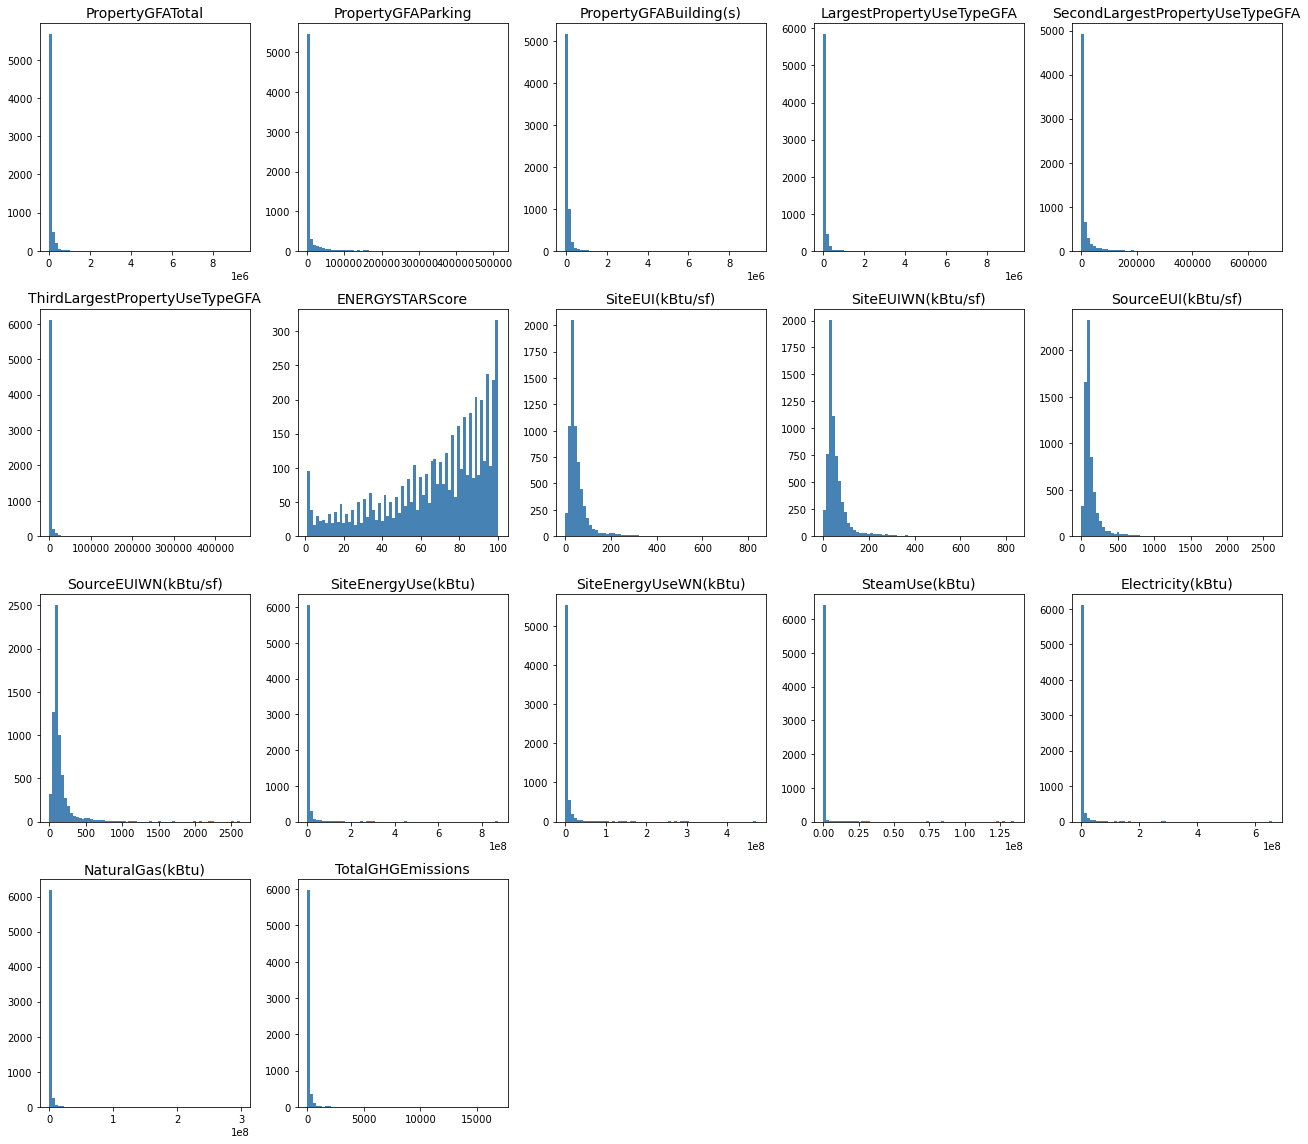

In [35]:
fig = plt.figure(figsize=(18, 16))
for feat_idx, feat in enumerate(quantitative_features):
    ax = fig.add_subplot(4,5, (feat_idx+1))
    h = ax.hist(raw_data[feat], bins=5*int(1+np.log2(raw_data.shape[0])), color = 'steelblue', density=False, edgecolor='none')
    ax.set_title(feat, fontsize=14)
    plt.tight_layout()

Données très dispersées. Echelles très différentes d'une variable à l'autre. On a des outliers. On a également des valeurs à 0 (NumberofBuildings, TotalGHGEmission, LargestPropertyUseTypeGFA etc.) Surement des valeurs aberrantes.  On vérifie.

In [36]:
for feat in quantitative_features:
    print(raw_data[feat].describe(percentiles=[0.5, 0.95]))
    print("-"*40)

count    6.541000e+03
mean     9.279707e+04
std      1.889737e+05
min      1.128500e+04
50%      4.399800e+04
95%      3.125120e+05
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64
----------------------------------------
count      6541.000000
mean       9504.505274
std       33963.532441
min          -3.000000
50%           0.000000
95%       55971.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64
----------------------------------------
count    6.541000e+03
mean     8.329256e+04
std      1.748241e+05
min     -5.055000e+04
50%      4.217200e+04
95%      2.724100e+05
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64
----------------------------------------
count    6.541000e+03
mean     7.699307e+04
std      1.682359e+05
min      5.656000e+03
50%      3.952000e+04
95%      2.412680e+05
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64
----------------------------------------
count      6541.000000
mean      13877.0

Confirmation de l'observation précédente: valeurs aberrantes (surfaces négatives), très dispersées (std >= moyenne), présence probable d'outliers (max >> {moyenne, mediane}). Distribution non-normales.

### II.2.2 outliers

On utilise la colonne "Outlier"

In [37]:
raw_data["Outlier"].head()

0             NaN
1             NaN
2             NaN
3    High Outlier
4             NaN
Name: Outlier, dtype: object

In [38]:
raw_data["Outlier"].unique()

array([nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'],
      dtype=object)

In [39]:
# On regroupe les outliers dans la catégorie "Yes", et les valeurs NaN dans "No"
outlier_yn = raw_data["Outlier"].where(raw_data["Outlier"].notna(), "No")
raw_data["Outlier_yn"] = outlier_yn
raw_data["Outlier_yn"] = raw_data["Outlier_yn"].apply(lambda x: "Yes" if x!="No" else x)

# On exclut les outliers
raw_data = raw_data.loc[raw_data.Outlier_yn=="No"]

# On supprime les colonnes "Outlier" et "Outlier_yn"
raw_data.drop(columns=["Outlier", "Outlier_yn"], inplace=True)

# On supprime également cette variables de la liste categorical
categorical_features = categorical_features.drop(["Outlier"])

In [40]:
# On corrige les valeurs négatives de PropertyGFABuilding(s)
m = raw_data["PropertyGFABuilding(s)"] <= 0
raw_data["PropertyGFABuilding(s)"].mask(m, -raw_data["PropertyGFABuilding(s)"], inplace=True)

# On retire les valeurs de TotalGHGEmissions, NumberofBuildings qui sont négatives ou nulles, et
# les valeurs de SiteEnergyUse(kBtu) qui sont nulles (nécessaire pour prendre le logarithme des variables
# cibles en vue des prédictions)
d = raw_data.query("TotalGHGEmissions<=0 or NumberofBuildings<=0 or `SiteEnergyUse(kBtu)`==0").index
raw_data.drop(index=d, inplace=True)

# Il y a un bâtiment de 99 étages dont les émissions sont quasi-nulles: on l'écarte, il s'agit certainement
# d'un outlier.
raw_data = raw_data[raw_data.NumberofFloors<80] 

In [41]:
# Reindexation du dataframe
raw_data.index = pd.Index(range(0, raw_data.shape[0]))

raw_data.to_csv("./data.csv", index_label=False)
data = raw_data

## II.2.3 Transformation des variables cibles

On remplace les variables targets par leur log.

In [42]:
data = pd.read_csv("./data.csv")

In [43]:
data["SiteEnergyUse_log"] = data["SiteEnergyUse(kBtu)"].apply(np.log10)
data["TotalGHGEmissions_log"] = data["TotalGHGEmissions"].apply(np.log10)
targets = pd.Index(["SiteEnergyUse_log", "TotalGHGEmissions_log"])
quantitative_features = quantitative_features.append(pd.Index(["SiteEnergyUse_log", "TotalGHGEmissions_log"]))

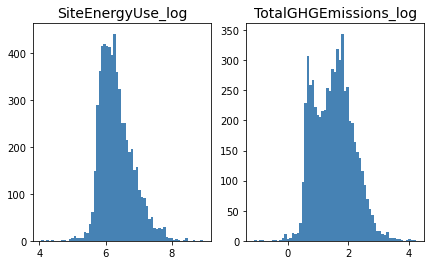

In [44]:
fig = plt.figure(figsize=(7, 4))
for feat_idx, feat in enumerate(targets):
    ax = fig.add_subplot(1,2, (feat_idx+1))
    h = ax.hist(data[feat], bins=5*int(1+np.log2(data.shape[0])), color = 'steelblue', density=False, edgecolor='none')
    ax.set_title(feat, fontsize=14)

Distribution clairement bi-modale pour TotalGHGEmissions_log

**SourceEUI, SourceEUIWN**

On commence par tester l'hypothèse selon laquelle le coefficient de proportionnalité entre les variables SiteEUI, SourceEUI (et leurs variantes WN) est égal à LargestPropertyUseTypeGFA.

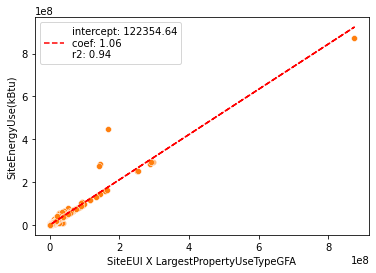

In [45]:
SiteEnergyUse = data["SiteEUI(kBtu/sf)"]*data["LargestPropertyUseTypeGFA"]

sns.scatterplot(data = SiteEnergyUse, y=data["SiteEnergyUse(kBtu)"])

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = SiteEnergyUse.to_numpy().reshape(-1, 1)
y = data["SiteEnergyUse(kBtu)"].to_numpy()

lr.fit(X, y)
r2 = lr.score(X, y)
sns.scatterplot(x=SiteEnergyUse, y=data["SiteEnergyUse(kBtu)"])
plt.plot(X, lr.intercept_ + X*lr.coef_, linestyle="--", color="r", label="intercept: {:.2f}\ncoef: {:.2f}\nr2: {:.2f}".format(lr.intercept_, lr.coef_[0], r2))
plt.legend()
plt.xlabel("SiteEUI X LargestPropertyUseTypeGFA")
plt.show()

In [46]:
data["SourceEnergyUseWN(kBtu)"] = data["SourceEUIWN(kBtu/sf)"]*data["LargestPropertyUseTypeGFA"]
data["SourceEnergyUse(kBtu)"] = data["SourceEUI(kBtu/sf)"]*data["LargestPropertyUseTypeGFA"]
quantitative_features = quantitative_features.append(pd.Index(["SourceEnergyUse(kBtu)", "SourceEnergyUseWN(kBtu)"]))

## II.2.4 Etude des corrélations

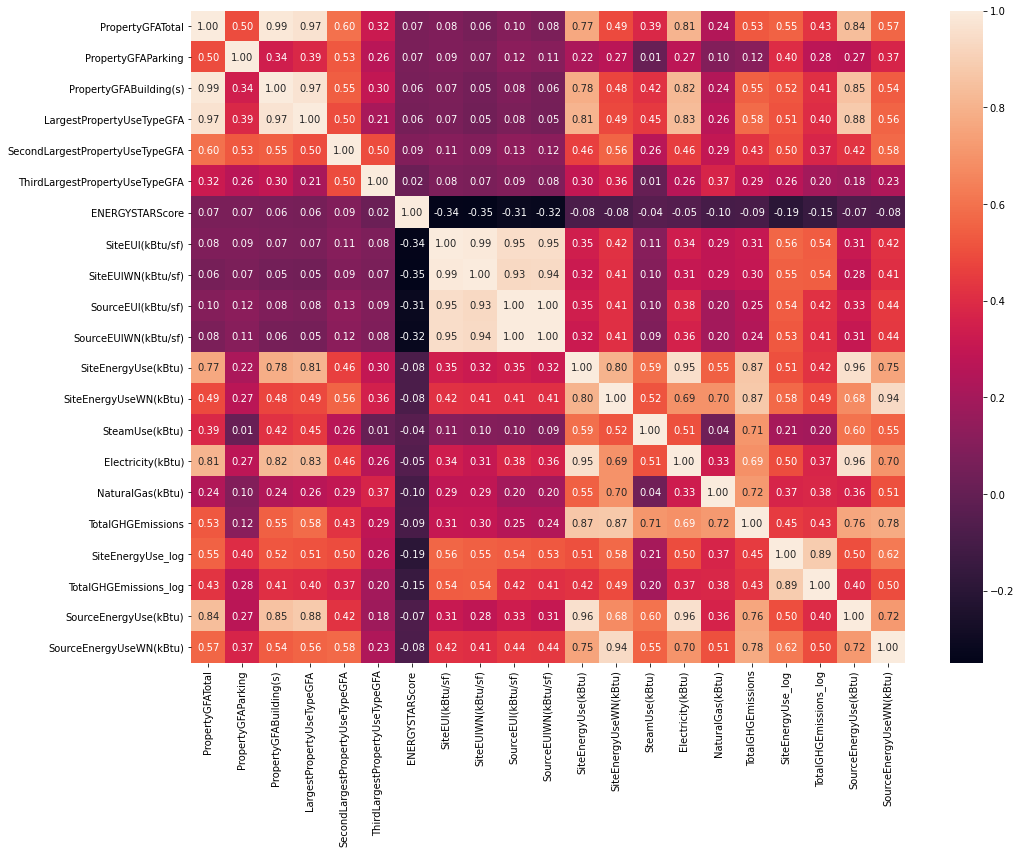

In [47]:
corr = data[quantitative_features].corr() # pearson
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Globalement, corrélations plus fortes avec les cibles  qu'avec les log des cibles. Les log des cibles sont plus fortement corrélées (linéairement) entre eux que les cibles elles-mêmes.
Enfin, SiteEnergyUse plus fortement corrélée avec les autres variables que TotalGHGEmissions: on va d'abord chercher à prédire SiteEnergyUse, puis on va chercher à prédire TotalGHGEmissions à partir de cette prédiction.

#### II.2.4.i Variables cibles

In [48]:
feats = ["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]
feats_log = ["TotalGHGEmissions_log", "SiteEnergyUse_log"]

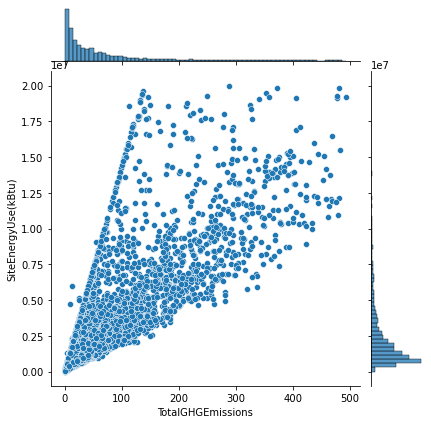

In [49]:
# jointplot sans les outliers pour une meilleure visualisation
sns.jointplot(data=data.query("TotalGHGEmissions<500 and `SiteEnergyUse(kBtu)`<2e7"), x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)")
plt.show()

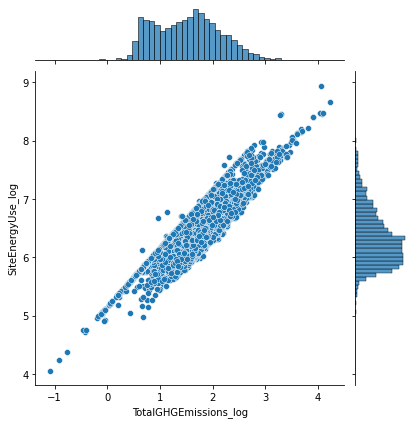

In [50]:
sns.jointplot(data=data, x="TotalGHGEmissions_log", y="SiteEnergyUse_log")
plt.show()

#### II.2.4.ii Prédicteurs

* On a de fortes corrélations entre les variables "PropertyGFATotal", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA"
* Ces variables sont elles-mêmes fortement corrélées à Electricity(kBtu)
* Electricity(kBtu) très fortement corrélée à SiteEnergyUSe
* Electricity, Steam, NaturalGas fortement corrélées à TotalGHGEmissions
* "L’objectif est de se passer des relevés de consommation annuels (attention à la fuite de données), mais rien n'interdit d’en déduire des variables plus simples (nature et proportions des sources d’énergie utilisées)."

### II.2.5 Transformation des variables "d'énergie"

SiteEnergyUse somme des énergies?

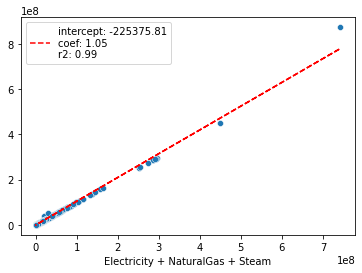

In [51]:
sum_energy = data["Electricity(kBtu)"] + data["NaturalGas(kBtu)"] + data["SteamUse(kBtu)"]

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = sum_energy.to_numpy().reshape(-1, 1)
y = data["SiteEnergyUse(kBtu)"].to_numpy()

lr.fit(X, y)
r2 = lr.score(X, y)
sns.scatterplot(x=sum_energy, y=y)
plt.plot(sum_energy, lr.intercept_ + sum_energy*lr.coef_, linestyle="--", color="r", label="intercept: {:.2f}\ncoef: {:.2f}\nr2: {:.2f}".format(lr.intercept_, lr.coef_[0], r2))
plt.legend()
plt.xlabel("Electricity + NaturalGas + Steam")
plt.show()

On est autorisé à utiliser des variables reflétant la _proportion_ et la _nature_ des énergies utilisées.

In [52]:
data["Electricity_ratio"] = data[["Electricity(kBtu)", "SiteEnergyUse(kBtu)"]].apply(lambda x: x[0]/x[1], axis=1)
data["NaturalGas_ratio"] = data[["NaturalGas(kBtu)", "SiteEnergyUse(kBtu)"]].apply(lambda x: x[0]/x[1], axis=1)
data["Steam_ratio"] = data[["SteamUse(kBtu)", "SiteEnergyUse(kBtu)"]].apply(lambda x: x[0]/x[1], axis=1)

quantitative_features = quantitative_features.append(pd.Index(["Electricity_ratio", "NaturalGas_ratio", "Steam_ratio"]))

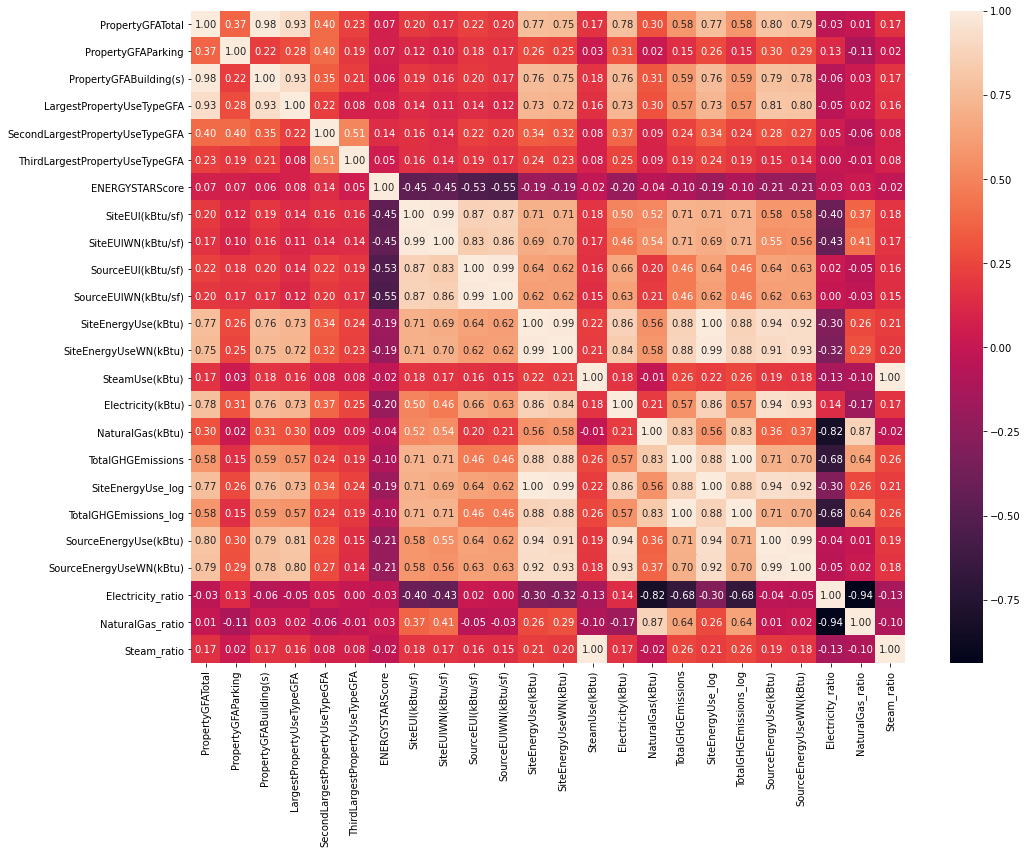

In [53]:
corr = data[quantitative_features].corr(method="spearman")
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

### II.2.6 ACP sur les variables quantitatives

PropertyGFATotal somme de PropertyGFAParking et PropertyGFABuilding(s) ?

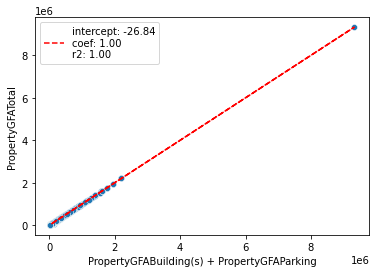

In [54]:
sum_pgfa = data.loc[:, ["PropertyGFABuilding(s)", "PropertyGFAParking"]].apply(np.sum, axis=1)
tot_pgfa = data.PropertyGFATotal

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = sum_pgfa.to_numpy().reshape(-1, 1)
y = tot_pgfa.to_numpy()

lr.fit(X, y)
r2 = lr.score(X, y)
sns.scatterplot(x=sum_pgfa, y=tot_pgfa)
plt.plot(sum_pgfa, lr.intercept_ + sum_pgfa*lr.coef_, linestyle="--", color="r", label="intercept: {:.2f}\ncoef: {:.2f}\nr2: {:.2f}".format(lr.intercept_, lr.coef_[0], r2))
plt.legend()
plt.xlabel("PropertyGFABuilding(s) + PropertyGFAParking")
plt.show()

$\rightarrow$ On n'utilisera pas PropertyGFAParking

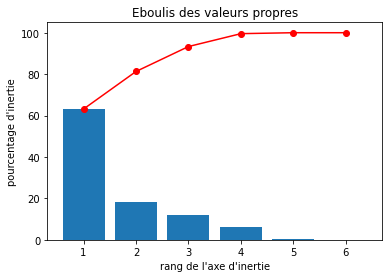

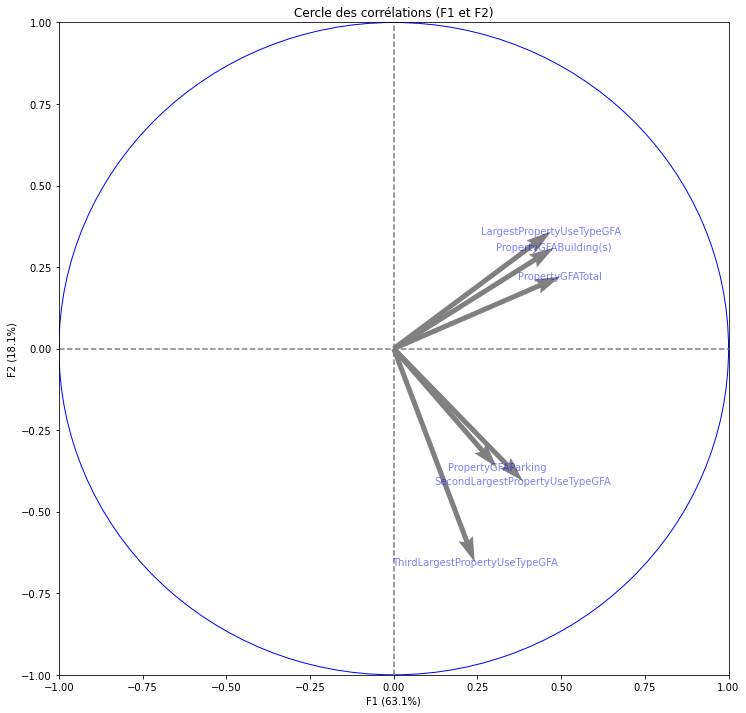

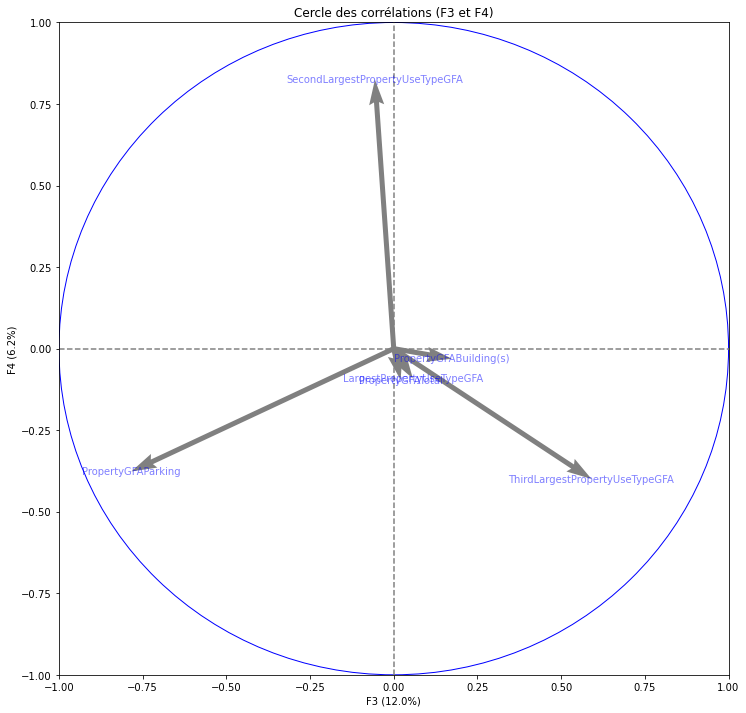

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from functions import *

# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)",
                 "LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA",
                 "ThirdLargestPropertyUseTypeGFA"
                ]]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_pca.index 
features = data_pca.columns

# Centrage et Réduction
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = PCA()
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels = np.array(names))

#plt.show()

In [56]:
data["F1"] = X_projected[:, 0]
data["F2"] = X_projected[:, 1]
data["F3"] = X_projected[:, 2]
data["F4"] = X_projected[:, 3]
data.drop(columns=data_pca.columns, inplace=True)
quantitative_features_pca = pd.Index([c for c in data.columns
                                      if c not in categorical_features])

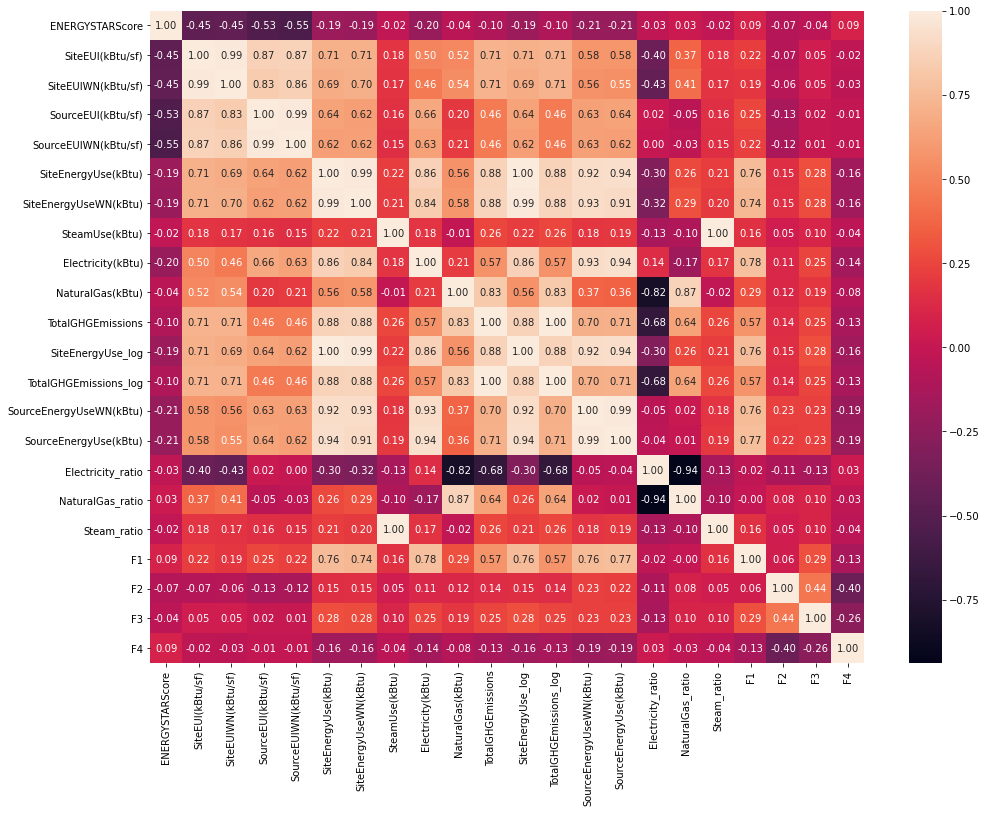

In [57]:
corr = data[quantitative_features_pca].corr(method="spearman")
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

## II.3 Variables catégorielles

### II.3.1 Nettoyage des variables catégorielles

On commence par afficher les variables catégorielles ainsi que le nombre de modalités pour chacune d'entre elles.

In [59]:
pd.DataFrame(data={"nombre de modalités":data[categorical_features].nunique()})

,nombre de modalités
BuildingType,8
PrimaryPropertyType,31
Address,129
Neighborhood,19
LargestPropertyUseType,57
SecondLargestPropertyUseType,51
ThirdLargestPropertyUseType,44
DataYear,2
YearBuilt,113
CouncilDistrictCode,7


Création d'une fonction permettant l'affichage pour une variable catégorielle donnée des différentes modalités et du nombre de représentants pour chacune d'entre elles.

In [60]:
def valuecount_df(var):
    counts = data[var].value_counts()
    return pd.DataFrame({"nb_items": counts})

In [61]:
categorical_features = ["BuildingType", "PrimaryPropertyType", "Neighborhood", "LargestPropertyUseType",
                        "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType", "Address", "YearBuilt",
                        "NumberofBuildings", "NumberofFloors"]

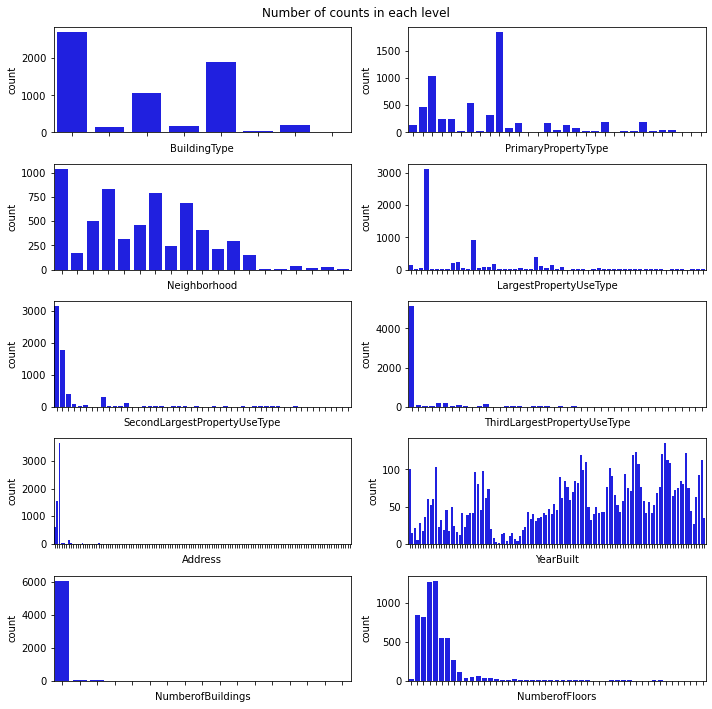

In [62]:
plt.figure(figsize=(10, 10))
plt.suptitle("Number of counts in each level")
for i, c in enumerate(categorical_features):
    ax = plt.subplot(5, 2, i+1)
    sns.countplot(data=data,
                  x=c,
                  color="b"
                  #orient="h",
                  #ax=axs[i]
                 )
    
    ax.set_xticklabels("")
    plt.tight_layout()
plt.show()    

On a $\approx$ 6200 éléments au total. Comme il y a pour chaque variable beaucoup de modalités ne comportant qu'un très faible nombre d'éléments, on va chercher à fusionner certaines modalités:
* Pour la variables YearBuilt, on va commencer par regrouper les années en décénnies.
* Pour les autres variables, on va fusionner toutes les catégories ayant moins de l'équivalent de 1% du jeu de données total. On considère que les modalités ayant trop peu d'éléments "bruitent" le modèle, plutôt que d'y apporter de l'information. On regroupera ces catégories dans la catégorie "Other".

Pour YearBuilt on commence par regrouper les années en décennies.

In [63]:
nb_decennies = 1+(data.YearBuilt.max()-data.YearBuilt.min())//10
bins = [1900+i*10 for i in range(nb_decennies)]
yb_grouped = np.digitize(data.YearBuilt, bins)
yb_grouped = pd.Series(data=yb_grouped, name="yb_grouped", dtype="int64")

data.YearBuilt = yb_grouped

In [64]:
def drop_class(var, nkeep):
    data[var] = data[var].apply(lambda x: "Other" 
                                if data[data[var]==x].shape[0] <= nkeep*data.shape[0]
                                else x)

# en fonction des résultats de prédiction des différents modèles on pourra modifier ce coefficient 
# pour écarter plus ou moins de modalités
nkeep = 0.01

In [65]:
for c in categorical_features:
    drop_class(c, nkeep)

pd.DataFrame(data={"nombre de modalités":data[categorical_features].nunique()})

,nombre de modalités
BuildingType,7
PrimaryPropertyType,15
Neighborhood,14
LargestPropertyUseType,12
SecondLargestPropertyUseType,7
ThirdLargestPropertyUseType,6
Address,5
YearBuilt,12
NumberofBuildings,2
NumberofFloors,9


Réaffichons les countplots de chaque variables catégorielle pour visualiser le résultat des fusions.

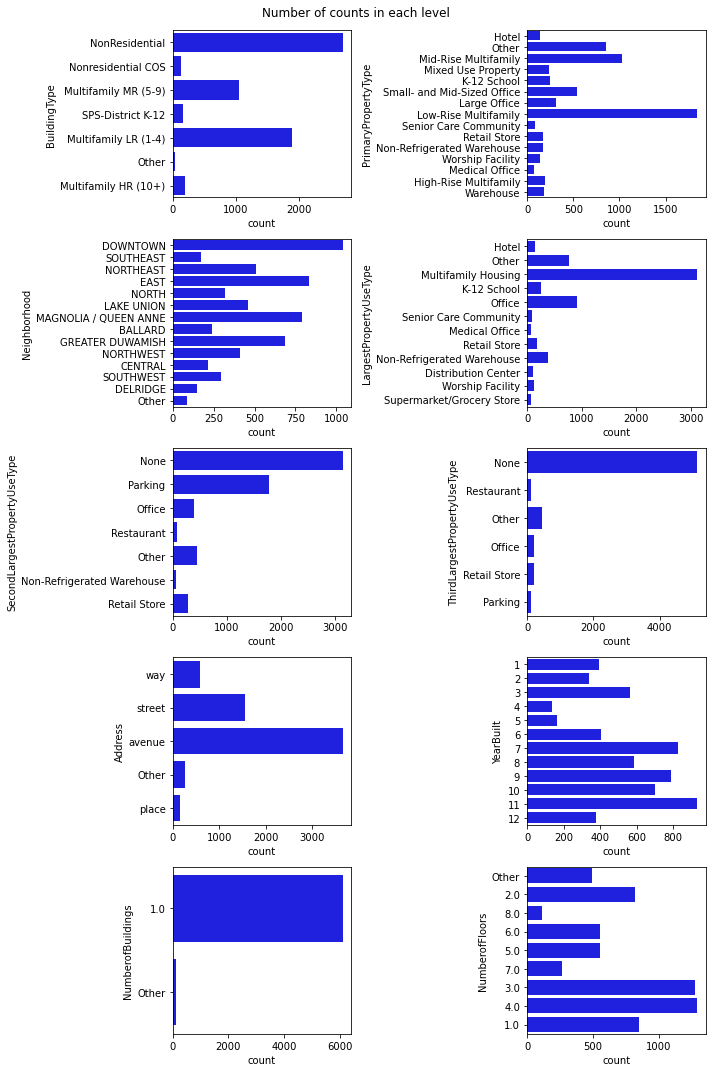

In [66]:
plt.figure(figsize=(10, 15))
plt.suptitle("Number of counts in each level", y=0.99)
for i, c in enumerate(categorical_features):
    ax = plt.subplot(5, 2, i+1)
    sns.countplot(data=data,
                  y=c, 
                  orient="h",
                  color="b"
                  #ax=axs[i]
                 )
    
    #ax.set_xticklabels("")
    plt.tight_layout()
plt.show()

In [67]:
data.to_csv("./modele1.csv", index_label=False)

### II.3.2 Etude des corrélations

On inspecte les associations existantes entre les variables quantitatives, d'abord entre chacune d'elles et les variables cibles, puis entre elles.

Ecriture d'une fonction qui affiche les diagrammes en boîte de chaque modalité versus la variable cible (SiteEnergyUse ou TotalGHGEmissions). On utilise les variables "originales" et non leur log, car pour l'analyse des corrélations il est nécessaire que l'échelle de la variables cible soit linéaire, et non logarithmique [1](#http://vassarstats.net/textbook/)

In [68]:
def make_plot(var, target, xmin=None, xmax=None, ax=None):
    means = data.groupby(var)[target].mean().sort_values().index
    
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 6), sharey=True)
    sns.boxplot(y=var, x=target, data=data, ax=ax, orient="h", showfliers=False, showmeans=True, order=means)
    #sns.countplot(data=data, y=var, orient="h", ax=ax2, order=means)
    try:
        ax1.set_xlim(xmin, xmax)
    except:
        pass
    #plt.show()

On écrit également une fonction permettant de réaliser une ANOVA. Cela permettra de déterminer les modalités qui peuvent être regroupées car statistiquement indiscernables. 

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def make_anova(data, quant_var, cat_var, subcat=None):
    model = '{} ~ {}'.format(quant_var, cat_var)
    try:
        mod = ols(model, data=data[data[cat_var].isin(subcat)].dropna(subset=[quant_var, cat_var], how="any")).fit()           
    except:
        mod = ols(model, data=data.dropna(subset=[quant_var, cat_var], how="any")).fit()           
    aov_table = sm.stats.anova_lm(mod, typ=2)
    esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])

    #print("Résultats de l'ANOVA pour les variables {} et {}:".format(quant_var, cat_var))
    #print("F: {:.2f}, p: {:.3f}".format(aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"]))
    #print("Eta-squared: {:.4f}".format(esq_sm))
    
    return aov_table, esq_sm

**Associations entre les cibles et les prédicteurs**

In [70]:
data.rename(columns={"SiteEnergyUse(kBtu)":"SiteEnergyUse"}, inplace=True) # La fonction ANOVA
target1 = "SiteEnergyUse"
target2 = "TotalGHGEmissions"

In [71]:
target = target1
anovas = {}
for var in categorical_features:
    aov_table, esq_sm = make_anova(data, target, var)
    anovas[var] = [aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"], esq_sm]
    #print(make_anova(data, target, var))

print("Associations des variables catégorielles avec SiteEnergyUse")
df_corrSEU = pd.DataFrame.from_dict(data=anovas,
             columns=["F", "p-value", "eta-squared"],
                       orient="index"
            ).sort_values(by=["eta-squared"], ascending=False)
df_corrSEU

Associations des variables catégorielles avec SiteEnergyUse


,F,p-value,eta-squared
BuildingType,96.978764,6.036412e-117,0.085773
NumberofFloors,65.927675,2.938503e-104,0.078399
PrimaryPropertyType,34.039956,3.390914e-89,0.071442
LargestPropertyUseType,32.509515,6.682560e-68,0.054558
NumberofBuildings,197.174338,4.066648e-44,0.030788
Neighborhood,7.780992,1.372462e-15,0.016066
ThirdLargestPropertyUseType,15.318189,5.377411e-15,0.012197
SecondLargestPropertyUseType,9.204077,4.640324e-10,0.008826
YearBuilt,15.920121,6.683310e-05,0.002558
Address,3.057732,1.578230e-02,0.001968


In [72]:
target = target2
anovas = {}
for var in categorical_features:
    aov_table, esq_sm = make_anova(data, target, var)
    anovas[var] = [aov_table.iloc[0]["F"], aov_table.iloc[0]["PR(>F)"], esq_sm]
    #print(make_anova(data, target, var))

print("Associations des variables catégorielles avec {}".format(target2))
pd.DataFrame.from_dict(data=anovas,
             columns=["F", "p-value", "eta-squared"],
                       orient="index"
            ).sort_values(by=["eta-squared"], ascending=False)

Associations des variables catégorielles avec TotalGHGEmissions


,F,p-value,eta-squared
BuildingType,76.059072,5.473655e-92,0.068539
PrimaryPropertyType,24.984929,3.852031e-64,0.053454
NumberofFloors,42.096079,4.256208e-66,0.051519
LargestPropertyUseType,30.095597,1.397686e-62,0.050712
NumberofBuildings,190.857395,8.833893e-43,0.029831
Neighborhood,4.471916,1.235675e-07,0.009297
SecondLargestPropertyUseType,5.424634,1.323959e-05,0.005221
ThirdLargestPropertyUseType,5.813455,2.312074e-05,0.004664
Address,4.002086,3.032204e-03,0.002574
YearBuilt,4.315099,3.781659e-02,0.000695


Globalement moins d'association avec TotalGHGEmissions.

On confirme les résultats ci-dessus visuellement, grâce aux répartitions des différentes modalités pour chaque variable.

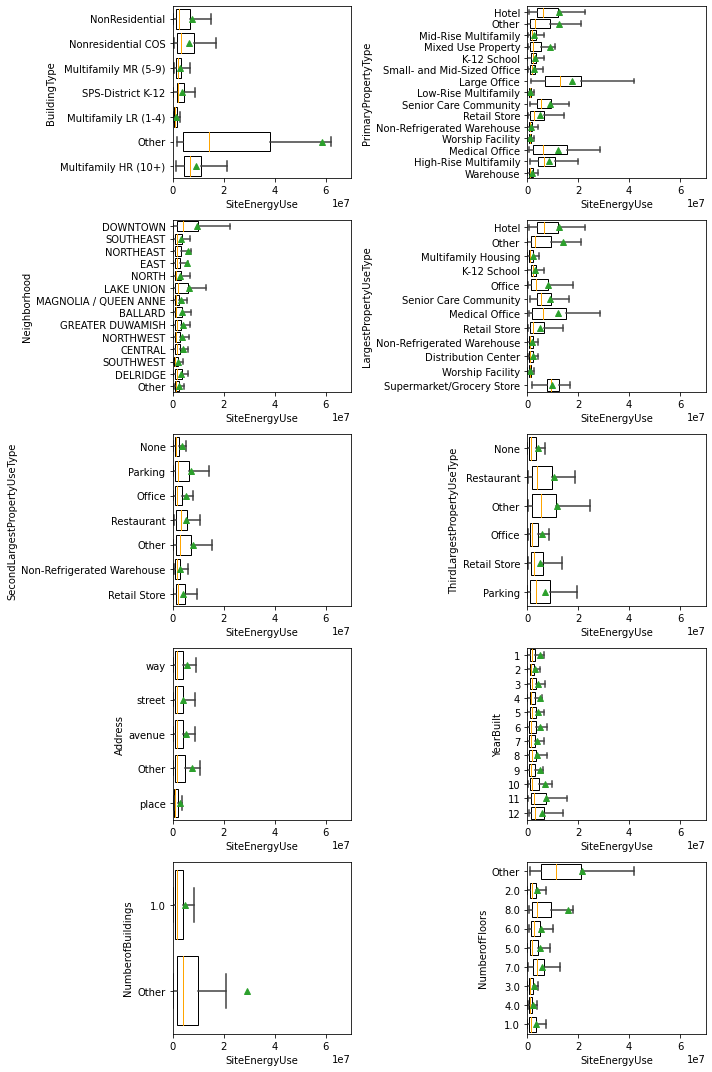

In [73]:
target = "SiteEnergyUse"
fig = plt.figure(figsize=(10, 15))
boxprops = dict(facecolor = "w", edgecolor='k', linewidth=1)
medianprops = dict(color='orange', linewidth=1)
for i, var in enumerate(categorical_features):
    ax = fig.add_subplot(5, 2, i+1)
    sns.boxplot(y=var, x=target, data=data, ax=ax, orient="h", showfliers=False, showmeans=True, 
                boxprops=boxprops, medianprops=medianprops)
    #ax.boxplot(data[[var, target]], vert=False, showfliers=False, showmeans=True)
    #make_plot(var, target, ax=ax)
    plt.tight_layout()
    ax.set_xlim([0, 7e7])
plt.show()


Création d'un nouveau modèle ne contenant que les variables catégorielles associées à plus de 5 % avec SiteEnergyUse.

In [74]:
least_correlated = df_corrSEU["eta-squared"][4:].index
data.drop(columns=least_correlated).to_csv("./modele2.csv", index_label=False)

On va maintenant inspecter les corrélations entre les 4 prédicteurs les plus associés avec SiteEnergyUse (association $\gt$ 5%). On définit la fonction contingence qui va permettre d'afficher les tables de contingence, et le résultat de tests du chi2 sur chaque paire.

In [75]:
data[categorical_features] = data[categorical_features].astype("object")

In [76]:
from scipy.stats import chi2_contingency

def contingence(Var1, Var2, df):
    X=Var1
    Y=Var2
    cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(df)
    indep = tx.dot(ty) / n

    c = cont.fillna(0) # On remplace les valeurs nulles par 0
    measure = (c-indep)**2/indep
    
    
    xi_n = measure.sum().sum()
    table = measure/xi_n
    totx = table.sum(axis=0)
    toty = table.sum(axis=1)
    plt.figure(figsize=(18, 6))
    sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
    chi2, pval, dof, chi2_table = chi2_contingency(c.iloc[:-1, :-1])
    
    #plt.figure(figsize=(18, 6))
    #sns.heatmap(chi2_table, annot=chi2_table, fmt=".0f")
    print("coefficient du chi2: {:.0f}".format(chi2))
    print("p-valeur: {}".format(pval))

**1. BuildingType**

coefficient du chi2: 22149
p-valeur: 0.0


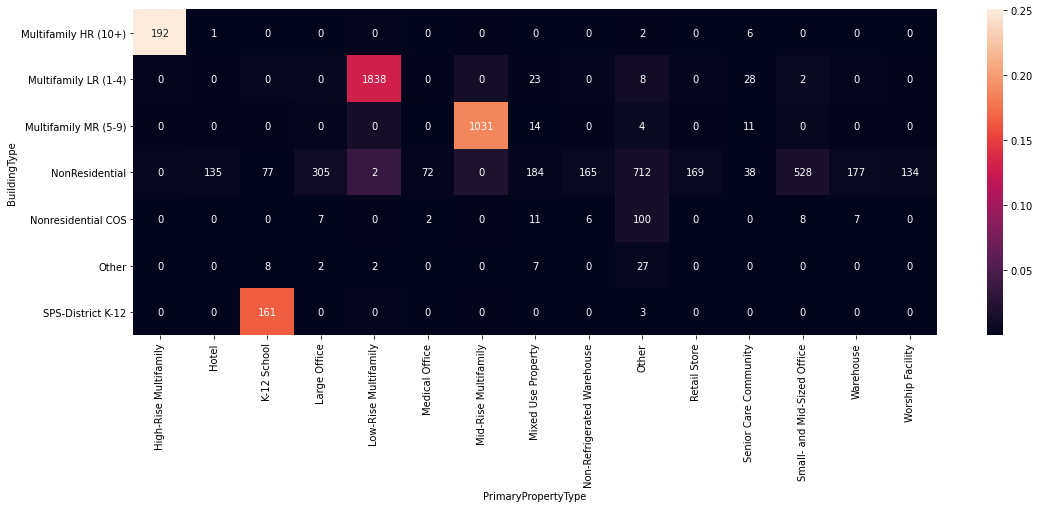

In [77]:
contingence("BuildingType", "PrimaryPropertyType", data)

coefficient du chi2: 10308
p-valeur: 0.0


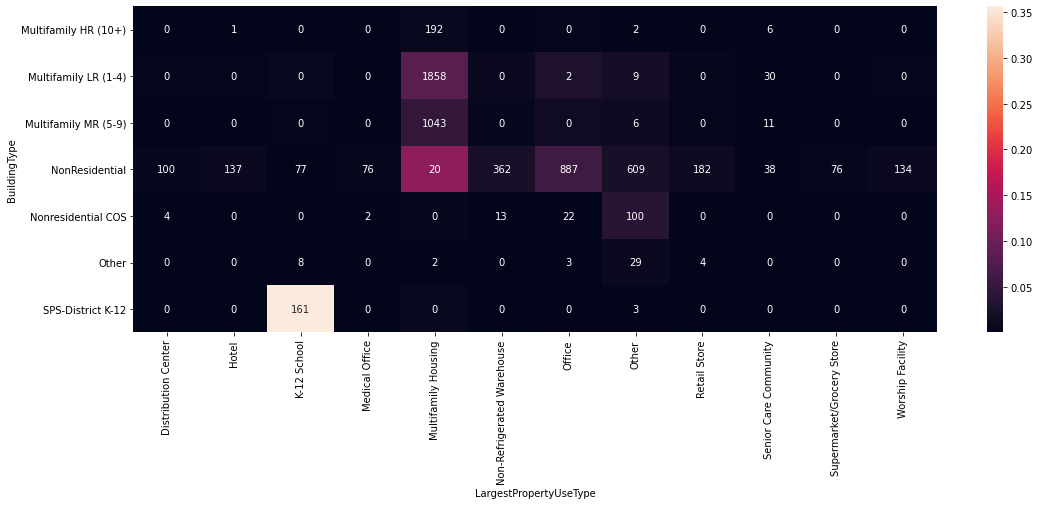

In [78]:
contingence("BuildingType", "LargestPropertyUseType", data)

coefficient du chi2: 9183
p-valeur: 0.0


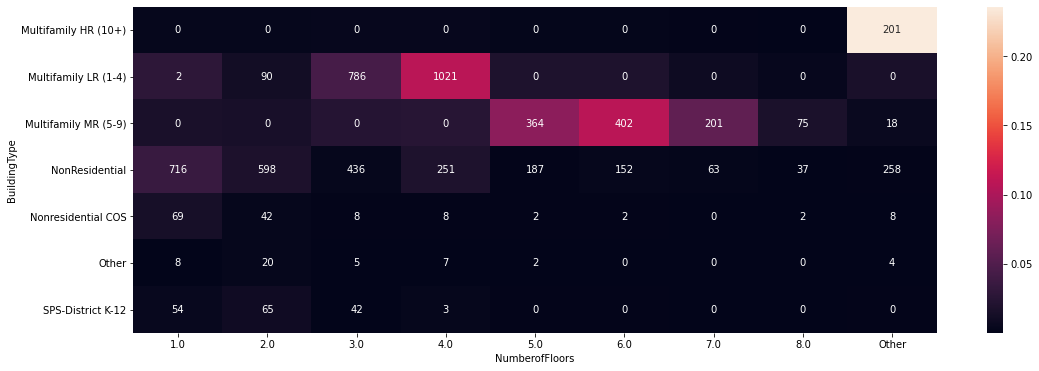

In [81]:
X="BuildingType"
Y="NumberofFloors"
data[Y] = data[Y].astype("str") # Pour éviter une erreur
contingence(X, Y, data)
data[Y] = data[Y].astype("object")

**2. PrimaryPropertyType**

In [ ]:
contingence("PrimaryPropertyType", "LargestPropertyUseType", data)

Forte redondance entre ces deux prédicteurs.

In [ ]:
contingence("NumberofFloors", "PrimaryPropertyType", data)

**3. LargestPropertyUseType vs NumberofFloors**

In [ ]:
contingence("NumberofFloors", "LargestPropertyUseType", data)